# Добавление алгоритма обхода графа в ширину для поиска кратчайшего пути в невзвешенных графах

In [11]:
# импортируем необходимые для работы библиотеки - networkX и matplotlib
import networkx as nx
import matplotlib.pyplot as plt

## Создание пустого графа

In [12]:
is_oriented = input('Создаём ориентированный граф? (y/n): ')
if is_oriented == 'y':
    G = nx.DiGraph()
else:
    G = nx.Graph()
print('G =', G)

Создаём ориентированный граф? (y/n): n
G = Graph with 0 nodes and 0 edges


## Создание полного графа

In [2]:
nodes = int(input('Введите число вершин для полного графа: '))
G = nx.complete_graph(nodes)

Введите число вершин для полного графа: 6


## Добавление узлов

In [13]:
only_one = input('Добавить один узел? (y/n): ')
if only_one == 'y':
    node = input('Введите название узла: ')
    G.add_node(node)
else:
    nodes = input('Введите названия узлов через пробел: ')
    nodes = nodes.split()
    G.add_nodes_from(nodes)

Добавить один узел? (y/n): 1 2 3 4 5 6 7
Введите названия узлов через пробел: 1 2 3 4 5 6 7


## Добавление рёбер

In [15]:
only_one = input('Добавить одно ребро? (y/n): ')
if only_one == 'y':
    weighted = input('Добавить взвешенное ребро? (y/n): ')
    if weighted == 'y':
        while True:
            edge = input('Введите через пробел пару вершин для образорвания ребра и вес ребра. Например, "2 5 0.6": ')
            edge = edge.split()
            if len(edge) != 3:
                print('Неправильно задано ребро!')
            else:
                try:
                    float(edge[-1])
                except ValueError:
                    print('Вес ребра должен быть числом!')
                    continue
                else:
                    G.add_edge(*edge[:2], weight=float(edge[2]))
                    break
    else:
        while True:
            edge = input('Введите через пробел пару вершин для образорвания ребра: ')
            edge = edge.split()
            if len(edge) != 2:
                print('Неправильно задано ребро!')
            else:
                G.add_edge(*edge)
                break
else:
    weighted = input('Добавить взвешенные ребра? (y/n): ')
    if weighted == 'y':
        while True:
            edges = input('Введите через пробел пару вершин для образорвания ребра и вес ребра. ' +
                          'Разделйте пары запятой. Например, "2 5 0.6, 3 4 8, 5 6 5.2": ')
            edges = edges.split(',')
            edges = [edge.strip().split() for edge in edges]
            mask = [len(edge) != 3 for edge in edges]
            if any(mask):
                print(f'Неверный формат ребра под номером {mask.index(True) + 1}!')
            else:
                for edge in edges:
                    try:
                        float(edge[-1])
                    except ValueError:
                        print(f'Вес ребра номер {edges.index(edge) + 1} должен быть числом!')
                        break
                    else:
                        G.add_edge(*edge[:2], weight=float(edge[2]))
                else:
                    break
    else:
        while True:
            edges = input('Введите через пробел вершины для образования рёбер, для очередной пары будет образовано ребро: ')
            edges = edges.split()
            if len(edges) % 2 != 0:
                print('Рёбра должны быть образованы чётным числом вершин!')
            else:
                edges_list = [edges[i:i+2] for i in range(0, len(edges) - 1, 2)]
                G.add_edges_from(edges_list)
                break

Добавить одно ребро? (y/n): n
Добавить взвешенные ребра? (y/n): n
Введите через пробел вершины для образования рёбер, для очередной пары будет образовано ребро: 1 2 3 4 5 6 1 4 2 3 6 7


## Удаление узлов

In [8]:
only_one = input('Удалить один узел? (y/n): ')
if only_one == 'y':
    node = input('Введите название узла: ')
    if node not in G.nodes():
        print(f'Узла {node} нет в графе! В графе имеются узлы {G.nodes()}')
    else:
        G.remove_node(node)
else:
    nodes = input('Введите названия узлов через пробел: ')
    nodes = nodes.split()
    for node in nodes:
        if node not in G.nodes():
            print(f'Узла {node} нет в графе! В графе имеются узлы {G.nodes()}')
            break
    else:
        G.remove_nodes_from(nodes)

Удалить один узел? (y/n): n
Введите названия узлов через пробел: 1234
Узла 1234 нет в графе! В графе имеются узлы ['1', '2', '3']


## Удаление рёбер

In [19]:
only_one = input('Удалить одно ребро? (y/n): ')
if only_one == 'y':
    while True:
        edge = input('Введите через пробел пару верши для удаления ребра: ')
        edge = tuple(edge.split())
        if len(edge) != 2:
            print('Неправильно задано ребро! Ребро задаётся двумя вершинами!')
        elif edge not in G.edges():
            print(f'Между вершинами {edge[0]} и {edge[1]} нет ребра')
        else:
            G.remove_edge(*edge)
            break
else:
    while True:
        edges = input('Введите через пробел вершины для удаления рёбер, для очередной пары будет удалено ребро: ')
        edges = edges.split()
        if len(edges) % 2 != 0:
            print('Рёбра должны быть образованы чётным числом вершин!')
            continue
        edges_list = tuple(edges[i:i+2] for i in range(0, len(edges) - 1, 2))
        for edge in edges_list:
            if edge not in G.edges:
                print(f'Ребра {edge} нет в графе G! Есть рёбра: {G.edges()}')
                break
        else:
            edges_list = [edges[i:i+2] for i in range(0, len(edges) - 1, 2)]
            G.remove_edges_from(edges_list)
            break

Удалить одно ребро? (y/n): n
Введите через пробел вершины для удаления рёбер, для очередной пары будет удалено ребро: 1 3 7 5


## Вывод информации о числе узлов и ребер графа

In [26]:
print('Узлы графа:', G.nodes())
print('Рёбра графа:', G.edges())
print('Узел и его смежности:')
for node, neighbour in G.adj.items():
    neighbours = []
    for nbr, nbr_props in neighbour.items():
        neighbours.append(nbr)
    print(f'Для узла {node} смежными являются {neighbours}')

Узлы графа: ['1', '2', '3', '4', '5', '6', '7']
Рёбра графа: [('1', '2'), ('1', '4'), ('2', '3'), ('3', '4'), ('5', '6'), ('6', '7')]
Узел и его смежности:
Для узла 1 смежными являются ['2', '4']
Для узла 2 смежными являются ['1', '3']
Для узла 3 смежными являются ['4', '2']
Для узла 4 смежными являются ['3', '1']
Для узла 5 смежными являются ['6']
Для узла 6 смежными являются ['5', '7']
Для узла 7 смежными являются ['6']


## Вывод топологии графа в графическом виде

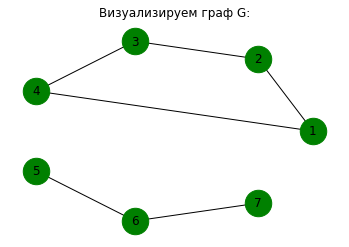

In [16]:
plt.title("Визуализируем граф G:")
weights = nx.get_edge_attributes(G, 'weight')
pos = nx.circular_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)
plt.show()

## Сохранение топологии графа в графическом виде

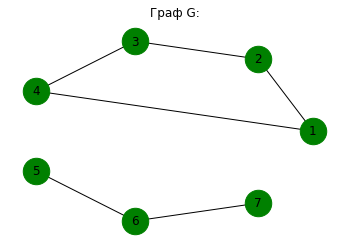

In [27]:
plt.title("Граф G:")
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)
plt.savefig("graph.png")

## Сохранение топологии в формате gml

In [28]:
nx.write_gml(G, 'graph.gml')

## Чтение графа из файла gml

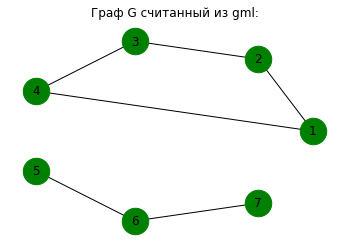

In [29]:
readed_G = nx.read_gml('graph.gml')
plt.title("Граф G считанный из gml:")
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)

## Поиск кратчайшего расстояния между двумя вершинами по алгоритму Дейкстры

Введите первую вершину: 3
Введите вторую вершину: 6


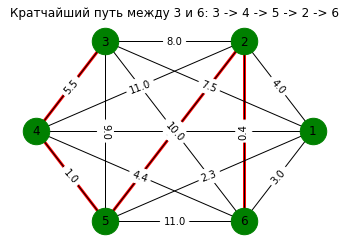

In [13]:
while True:
    node1 = input('Введите первую вершину: ')
    if node1 in G.nodes():
        break
    else:
        print(f'Вершины {node1} нет в графе')
while True:
    node2 = input('Введите вторую вершину: ')
    if node2 in G.nodes():
        break
    else:
        print(f'Вершины {node2} нет в графе')
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
shortest_path_s_v = nx.reconstruct_path(node1,  node2, predecessors)
plt.title(f"Кратчайший путь между {node1} и {node2}: {' -> '.join(shortest_path_s_v)}")
edges = [(a,b) for a,b in zip(shortest_path_s_v, shortest_path_s_v[1:])]
weights = nx.get_edge_attributes(G, 'weight')
pos = nx.circular_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)         

## Функция обхода графа в ширину для поиска кратчайшего пути между двумя вершинами невзвешенного графа

In [9]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # очередь для прохода по графу
    queue = [[start]]
     
    if start == goal:
        # искомый узео достигнут
        print("Same Node")
        return
     
    # проходим по узлам графа через очередь
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # проверяем, что текущий узел не был посещён
        if node not in explored:
            neighbours = graph[node]
             
            # проходим по соседям текущего узла
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # проверяем, является ли соседний узел искомым
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # исходный и искомый узлы не связаны
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return

Shortest path =  E A C G


## Применение функции обхода в ширину для поиска кратчашего пути между двумя вершинами графа для произвольного графа

In [21]:
# формируем нужную структуру связей вершин для функции поиска
graph = {node: list(neighbours) for node, neighbours in G.adj.items()}

In [22]:
graph

{'1': ['2', '4'],
 '2': ['1', '3'],
 '3': ['4', '2'],
 '4': ['3', '1'],
 '5': ['6'],
 '6': ['5', '7'],
 '7': ['6']}

In [25]:
# задаём вершины для поиска кратчайшего пути
node1 = input('Введите первую вершину: ')
node2 = input('Введите вторую вершину: ')
BFS_SP(graph, node1, node2)

Введите первую вершину: 2
Введите вторую вершину: 4
Shortest path =  2 1 4
